# Marlon Tzorin - Lab5 - 20180072

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### Leer el archivo CSV proporcionado (Admission_Predict.csv, https://www.kaggle.com/mohansacharya/graduate-admissions) y almacenarlo en un np.array para ser trabajado en el notebook.

In [4]:
df = pd.read_csv('Admission_Predict.csv')
df.insert(loc=0, column='unos', value=1) 

In [8]:
df = df.sample(frac=1)
data = np.array(df)
train, validate, test = np.split(data, [int(len(data)*0.7), int(len(data)*0.85)])

### X & Y

In [10]:
X_train = train[:,0:9]
x_cv = validate[:,0:9]
x_test = test[:,0:9]

y_train = train[:,9].reshape(len(X_train),1)
y_cv = validate[:,9].reshape(len(x_cv),1)
y_test = test[:,9].reshape(len(x_test),1)

### Asegúrese de usar el lambda que mejor apoye al modelo que ha implementado para describir y predecir la información sobre la nube de datos.

In [15]:
def linear_function_cost(X, y, theta, lamb):
    h = X @ theta
    lamb = (lamb/(2*len(X))) * (theta**2).sum()
    return ((y - h) ** 2).sum() / (2 * len(X)) + lamb

def linear_gradient_cost(X, y, theta, lamb):
    h = X @ theta
    lamb = lamb*theta
    return (((h - y).T @ X).T + lamb) / len(X)

def gradient_descent_cost(X, y, theta_0, linear_function, linear_gradient, learning_rate=0.0000001, threshold= 2, max_iter=1000, lamb=10):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []
    while np.linalg.norm(linear_gradient(X, y, theta,lamb)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - (learning_rate * linear_gradient(X, y, theta, lamb))
        costs.append(linear_function(X, y, theta, lamb))
        thetas.append(theta.copy())
    return theta, costs, thetas

m, n =  X_train.shape
random_theta1 = np.random.rand(n,1)

### P1

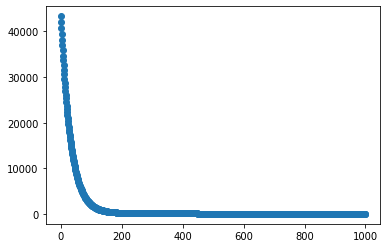

In [16]:
theta_results1, costs1, thetas1 = gradient_descent_cost(X_train, y_train, random_theta1, linear_function_cost, linear_gradient_cost, lamb=10)
xrow = np.arange(0,1000,1).reshape(-1,1)
plt.scatter(xrow, costs1)
plt.show()

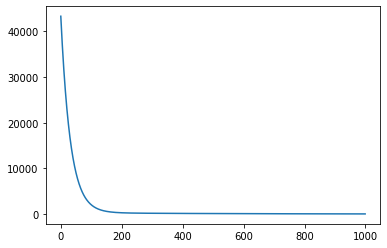

In [31]:
plt.plot(costs1)

In [18]:
costs1[-1]

49.77554169696632

El modelo tiene un poco de variación entre los 3 sets (training, testing y el CV). Sin embargo, vemos que la función de costo casi llega a 0 lo cual es algo bueno. Analizaremos otros polinomios para ver si logramos mejorar el modelo

# P2

In [21]:
p2 = (X_train[:,1]**2).reshape(len(X_train),1)
X_train2 = np.append(X_train, p2, axis=1)
p2 = (x_cv[:,1]**2).reshape(len(x_cv),1)
x_cv2 = np.append(x_cv, p2, axis=1)
p2 = (x_test[:,1]**2).reshape(len(x_test),1)
x_test2 = np.append(x_test, p2, axis=1)
m,n = X_train.shape
random_theta2 = np.random.rand(n+1,1)

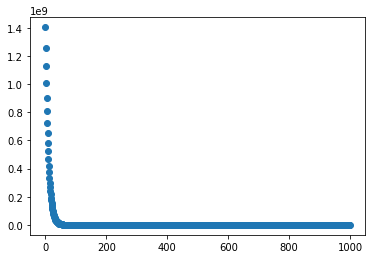

In [23]:
theta_results2, costs2, thetas2 = gradient_descent_cost(X_train2, y_train, random_theta2, linear_function_cost, linear_gradient_cost, learning_rate=0.00000000001, lamb=10)
xrow = np.arange(0,1000,1).reshape(-1,1)
plt.scatter(xrow, costs2)
plt.show()

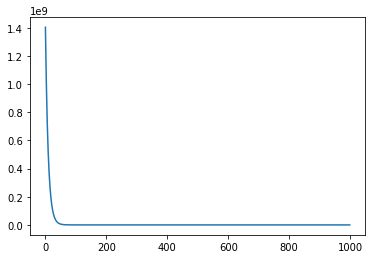

In [32]:
plt.plot(costs2)

In [18]:
costs2[-1]

12998.715414664128

# P3

In [25]:
p3 = (X_train[:,1]**3).reshape(len(X_train),1)
X_train3 = np.append(X_train2, p3, axis=1)
p3 = (x_cv[:,1]**3).reshape(len(x_cv),1)
x_cv3 = np.append(x_cv2, p3, axis=1)
p3 = (x_test[:,1]**3).reshape(len(x_test),1)
x_test3 = np.append(x_cv2, p3, axis=1)
m,n = X_train3.shape
random_theta3 = np.random.rand(n,1)


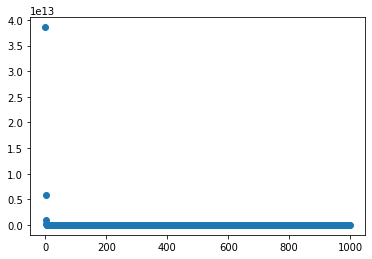

In [34]:
theta_results3, costs3, thetas3 = gradient_descent_cost(X_train3, y_train, random_theta3, linear_function_cost, linear_gradient_cost, learning_rate=0.000000000000001)
xrow = np.arange(0,1000,1).reshape(-1,1)
plt.scatter(xrow, costs3)
plt.show()

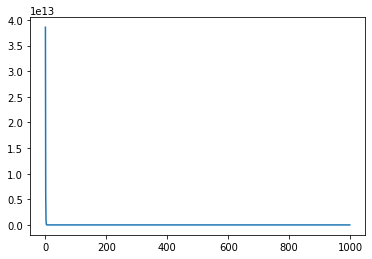

In [33]:
plt.plot(costs3)

In [28]:
costs3[-1]

9828982.832451964

# Conclusiones
Al probar con 3 diferentes polinomios me di cuenta que entre el polinomio 2 y 3 realmente todo se va por un drenaje , por lo cual creo que se llego a ese punto en el que polinomio marginal tiene un efecto decreciente , en otros palabras que con el poliniomio 2 llego a su punto optimo. El parametro de lamba usado fue de 10 a discrecion de su servidor. y no se puede apreciar que haya algun tipo de bias o variance.